# Exercise 8 Reinforcement Learning I 
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Good vs. bad Döner

In [2]:
n_states = 50
good_doener_val = 1000
bad_doener_val = 100

rewards = np.repeat(-10, n_states + 2)
rewards[0] = 0
rewards[1] = good_doener_val
rewards[-2] = bad_doener_val
rewards[-1] = 0
rewards

array([   0, 1000,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  100,    0])

In [3]:
# For each state, two actions are possible.
# First q values note down-movement.
q_val = np.random.random((n_states + 2, 2))
q_val[0] = np.array([0, 0])
q_val[-1] = np.array([0, 0])

q_val

array([[0.00000000e+00, 0.00000000e+00],
       [4.35100789e-01, 3.99172407e-01],
       [3.89822862e-01, 6.72110283e-01],
       [5.54830694e-01, 5.42449103e-01],
       [4.84911041e-01, 7.15528382e-01],
       [6.23271458e-01, 1.12978209e-02],
       [5.88307367e-01, 5.52441410e-02],
       [2.53416265e-04, 1.16970488e-01],
       [3.12620868e-01, 3.64400024e-01],
       [5.73801529e-01, 3.85276424e-01],
       [2.98790037e-01, 4.23443749e-01],
       [4.41288374e-01, 1.43765875e-01],
       [8.38241722e-02, 1.98151595e-01],
       [9.60259875e-01, 7.30951762e-01],
       [1.66593032e-01, 3.55577019e-02],
       [1.66780497e-01, 5.97905175e-01],
       [9.09911827e-01, 6.88722855e-01],
       [7.00451788e-01, 6.15338147e-01],
       [2.63055507e-01, 9.97196541e-01],
       [7.86429170e-01, 5.37794413e-01],
       [4.12103384e-01, 4.95010786e-01],
       [2.16904364e-01, 9.69333543e-01],
       [1.85869122e-01, 2.85762128e-01],
       [4.87440628e-01, 4.87803788e-01],
       [6.395750

In [4]:
def choose_action(q, state, eps=0.1):
    """Return -1 for down, +1 for up."""
    action = None
   
    if np.random.random() < 1-eps:
        if q[state][0] > q[state][1]:
            action = -1
        else:
            action = 1
    else:
        action = np.random.choice([1, -1])
    return action

We used the algorithm description in the Barto Sutton (Chapter 6, SARSA).
However, we are not so sure where we went wrong. We checked the following:

-  The last rewards of each episode are always 100/1000 (by printing them at the end of every episode).
-  The q-values stay 0 for the artificial states which is correct. However, they do not seem to indicate clear, reasonable behaviour as we would always go for good doener (which happens empirically, see last plot, but is not reflect in the q values, they are so similar for both actions?).

**tl;dr Something seems fishy here and we are not sure what it is.**

In [5]:
# SARSA algorithm.
episodes = 50000
eta = 0.1
gamma = 1
trials_taken = []
rewards_received = []

for _ in range(episodes):
    state = np.random.randint(2, n_states-1)
    action = choose_action(q_val, state)
    i = 0
    reward = 0 # Needed for debugging only.
    
    while(state > 1 and state < q_val.shape[0]-2):
        new_state = state + action
        reward = rewards[new_state]

        new_action = choose_action(q_val, new_state)
        
        # For debugging single episodes.
#         print(f"States {state} --> {new_state} (reward {reward})")
        
        # Q-val-update
        action_idx = (action+1)//2
        new_action_idx = (new_action+1)//2
        
        q_val[state][action_idx] = q_val[state][action_idx] + eta * (reward + gamma * q_val[new_state][new_action_idx] - q_val[state][action_idx])
        
        state = new_state
        action = new_action
        
        i+=1
        
    rewards_received.append(reward)
    
    print(f"Stopped at state {state} with reward {reward}")
    trials_taken.append(i)

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with rew

Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with rew

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with rew

Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 50 with rew

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 50 with reward 100
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with reward 1000
Stopped at state 1 with rewa

In [6]:
q_val

array([[0.00000000e+00, 0.00000000e+00],
       [4.35100789e-01, 3.99172407e-01],
       [1.00043248e+03, 9.75579009e+02],
       [9.89883977e+02, 9.65522794e+02],
       [9.77878054e+02, 9.54685436e+02],
       [9.65046213e+02, 9.43595117e+02],
       [9.53361064e+02, 9.31608426e+02],
       [9.42946678e+02, 9.19494284e+02],
       [9.33107077e+02, 9.09977603e+02],
       [9.22613415e+02, 8.99347427e+02],
       [9.10872887e+02, 8.88050894e+02],
       [8.99829165e+02, 8.77184929e+02],
       [8.89555044e+02, 8.63193987e+02],
       [8.73828946e+02, 8.53473296e+02],
       [8.65660364e+02, 8.43184598e+02],
       [8.56526875e+02, 8.32119864e+02],
       [8.46953927e+02, 8.19669554e+02],
       [8.35665196e+02, 8.10642859e+02],
       [8.25579221e+02, 8.00203831e+02],
       [8.14343817e+02, 7.88473354e+02],
       [8.02659607e+02, 7.76301405e+02],
       [7.91533342e+02, 7.66042786e+02],
       [7.78228121e+02, 7.52590631e+02],
       [7.67280838e+02, 7.43324723e+02],
       [7.587042

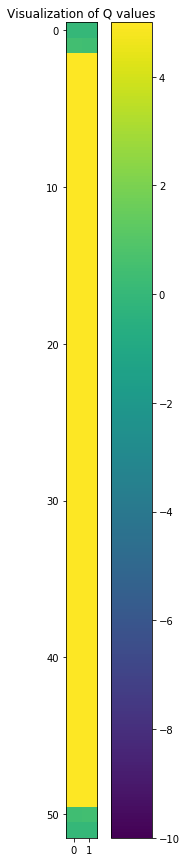

In [7]:
plt.figure(figsize = (5, 15))
plt.imshow(q_val, vmin = -10, vmax = 5)
plt.colorbar()
plt.title("Visualization of Q values");

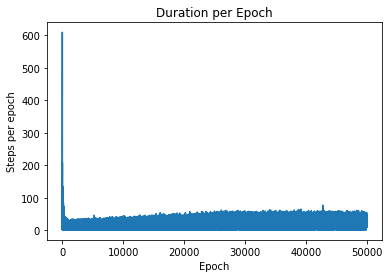

In [8]:
plt.plot(trials_taken)
plt.ylabel("Steps per epoch")
plt.xlabel("Epoch")
plt.title("Duration per Epoch");

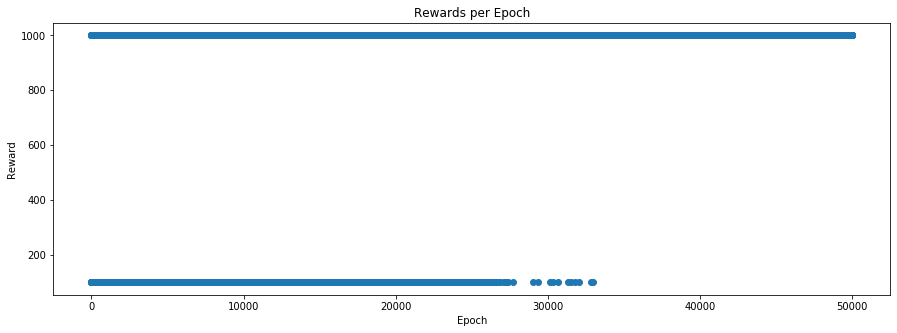

In [9]:
plt.figure(figsize = (15, 5))
plt.scatter(np.linspace(0, len(rewards_received), len(rewards_received)), rewards_received)
plt.title("Rewards per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Reward");

This seems to indicate that the agent learns to always go for the good doener.

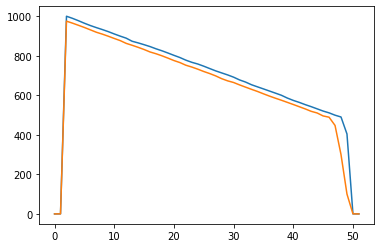

In [11]:
plt.plot(q_val[:, 0])
plt.plot(q_val[:, 1])